<a href="https://colab.research.google.com/github/BahodirML/ML_Projects/blob/main/Traffic_Sign!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [8]:
with open("/content/test.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/train.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/valid.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [9]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
X_train.shape

(12630, 32, 32, 3)

In [11]:
y_train.shape

(12630,)

1

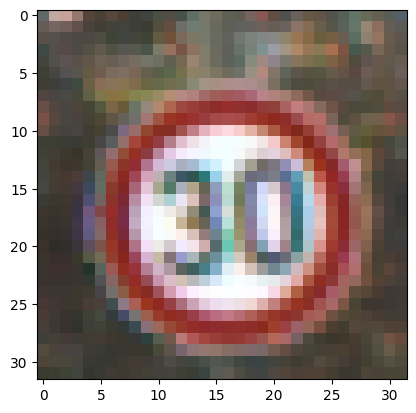

In [12]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [13]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [14]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [15]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [16]:
X_train_gray.shape

(12630, 32, 32, 1)

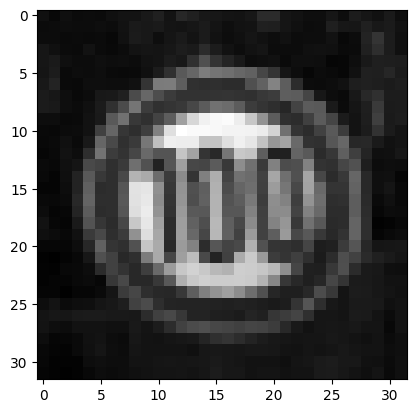

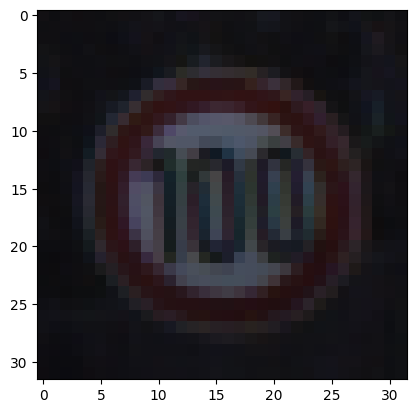

In [17]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [18]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [19]:
image_shape = X_train_gray[i].shape

In [20]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [21]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [22]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,  # Corrected from 'epoch' to 'epochs'
                        verbose=1,
                        validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/50
26/26 [==============================] - 6s 52ms/step - loss: 3.5288 - accuracy: 0.0989 - val_loss: 3.4015 - val_accuracy: 0.1167
Epoch 2/50
26/26 [==============================] - 0s 18ms/step - loss: 2.9825 - accuracy: 0.2193 - val_loss: 3.0907 - val_accuracy: 0.1919
Epoch 3/50
26/26 [==============================] - 0s 15ms/step - loss: 2.3318 - accuracy: 0.3671 - val_loss: 2.5783 - val_accuracy: 0.3246
Epoch 4/50
26/26 [==============================] - 0s 18ms/step - loss: 1.6918 - accuracy: 0.5263 - val_loss: 2.2013 - val_accuracy: 0.4331
Epoch 5/50
26/26 [==============================] - 0s 18ms/step - loss: 1.2916 - accuracy: 0.6325 - val_loss: 2.0539 - val_accuracy: 0.4767
Epoch 6/50
26/26 [==============================] - 0s 14ms/step - loss: 1.0540 - accuracy: 0.6923 - val_loss: 1.8809 - val_accuracy: 0.5289
Epoch 7/50
26/26 [==============================] - 0s 19ms/step - loss: 0.8580 - accuracy: 0.7561 - val_loss: 1.8375 - val_accuracy: 0.5517
Epoch 8/50
26

In [23]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7152


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

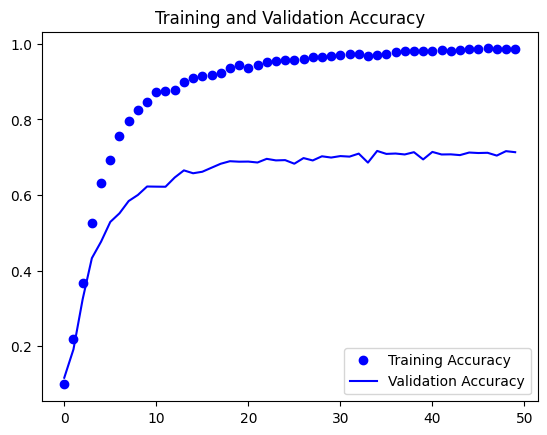

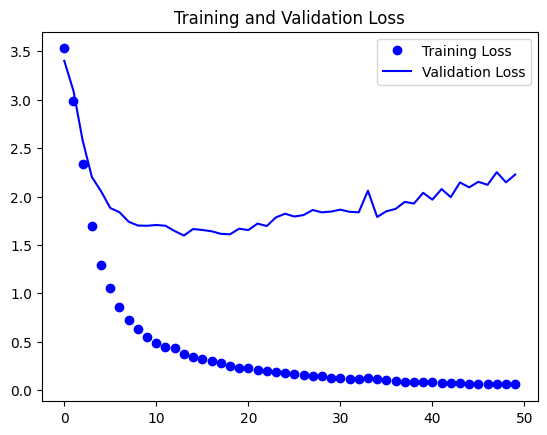

In [26]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs
epochs = range(len(accuracy))

# Plot training and validation accuracy
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

# Plot training and validation loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Show the plot
plt.show()


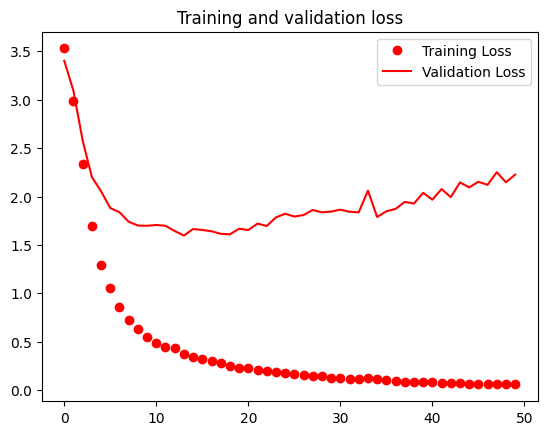

In [27]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

138/138 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.23      0.35        30
           1       0.68      0.75      0.71       240
           2       0.53      0.74      0.62       240
           3       0.75      0.80      0.78       150
           4       0.63      0.87      0.73       210
           5       0.87      0.59      0.70       210
           6       0.53      0.92      0.67        60
           7       0.82      0.81      0.81       150
           8       0.84      0.60      0.70       150
           9       0.76      0.88      0.81       150
          10       0.96      0.90      0.93       210
          11       0.70      0.77      0.73       150
          12       0.66      0.80      0.72       210
          13       0.95      0.93      0.94       240
          14       0.83      0.94      0.89        90
          15       0.72      0.83      0.77        90
          16       1.00   

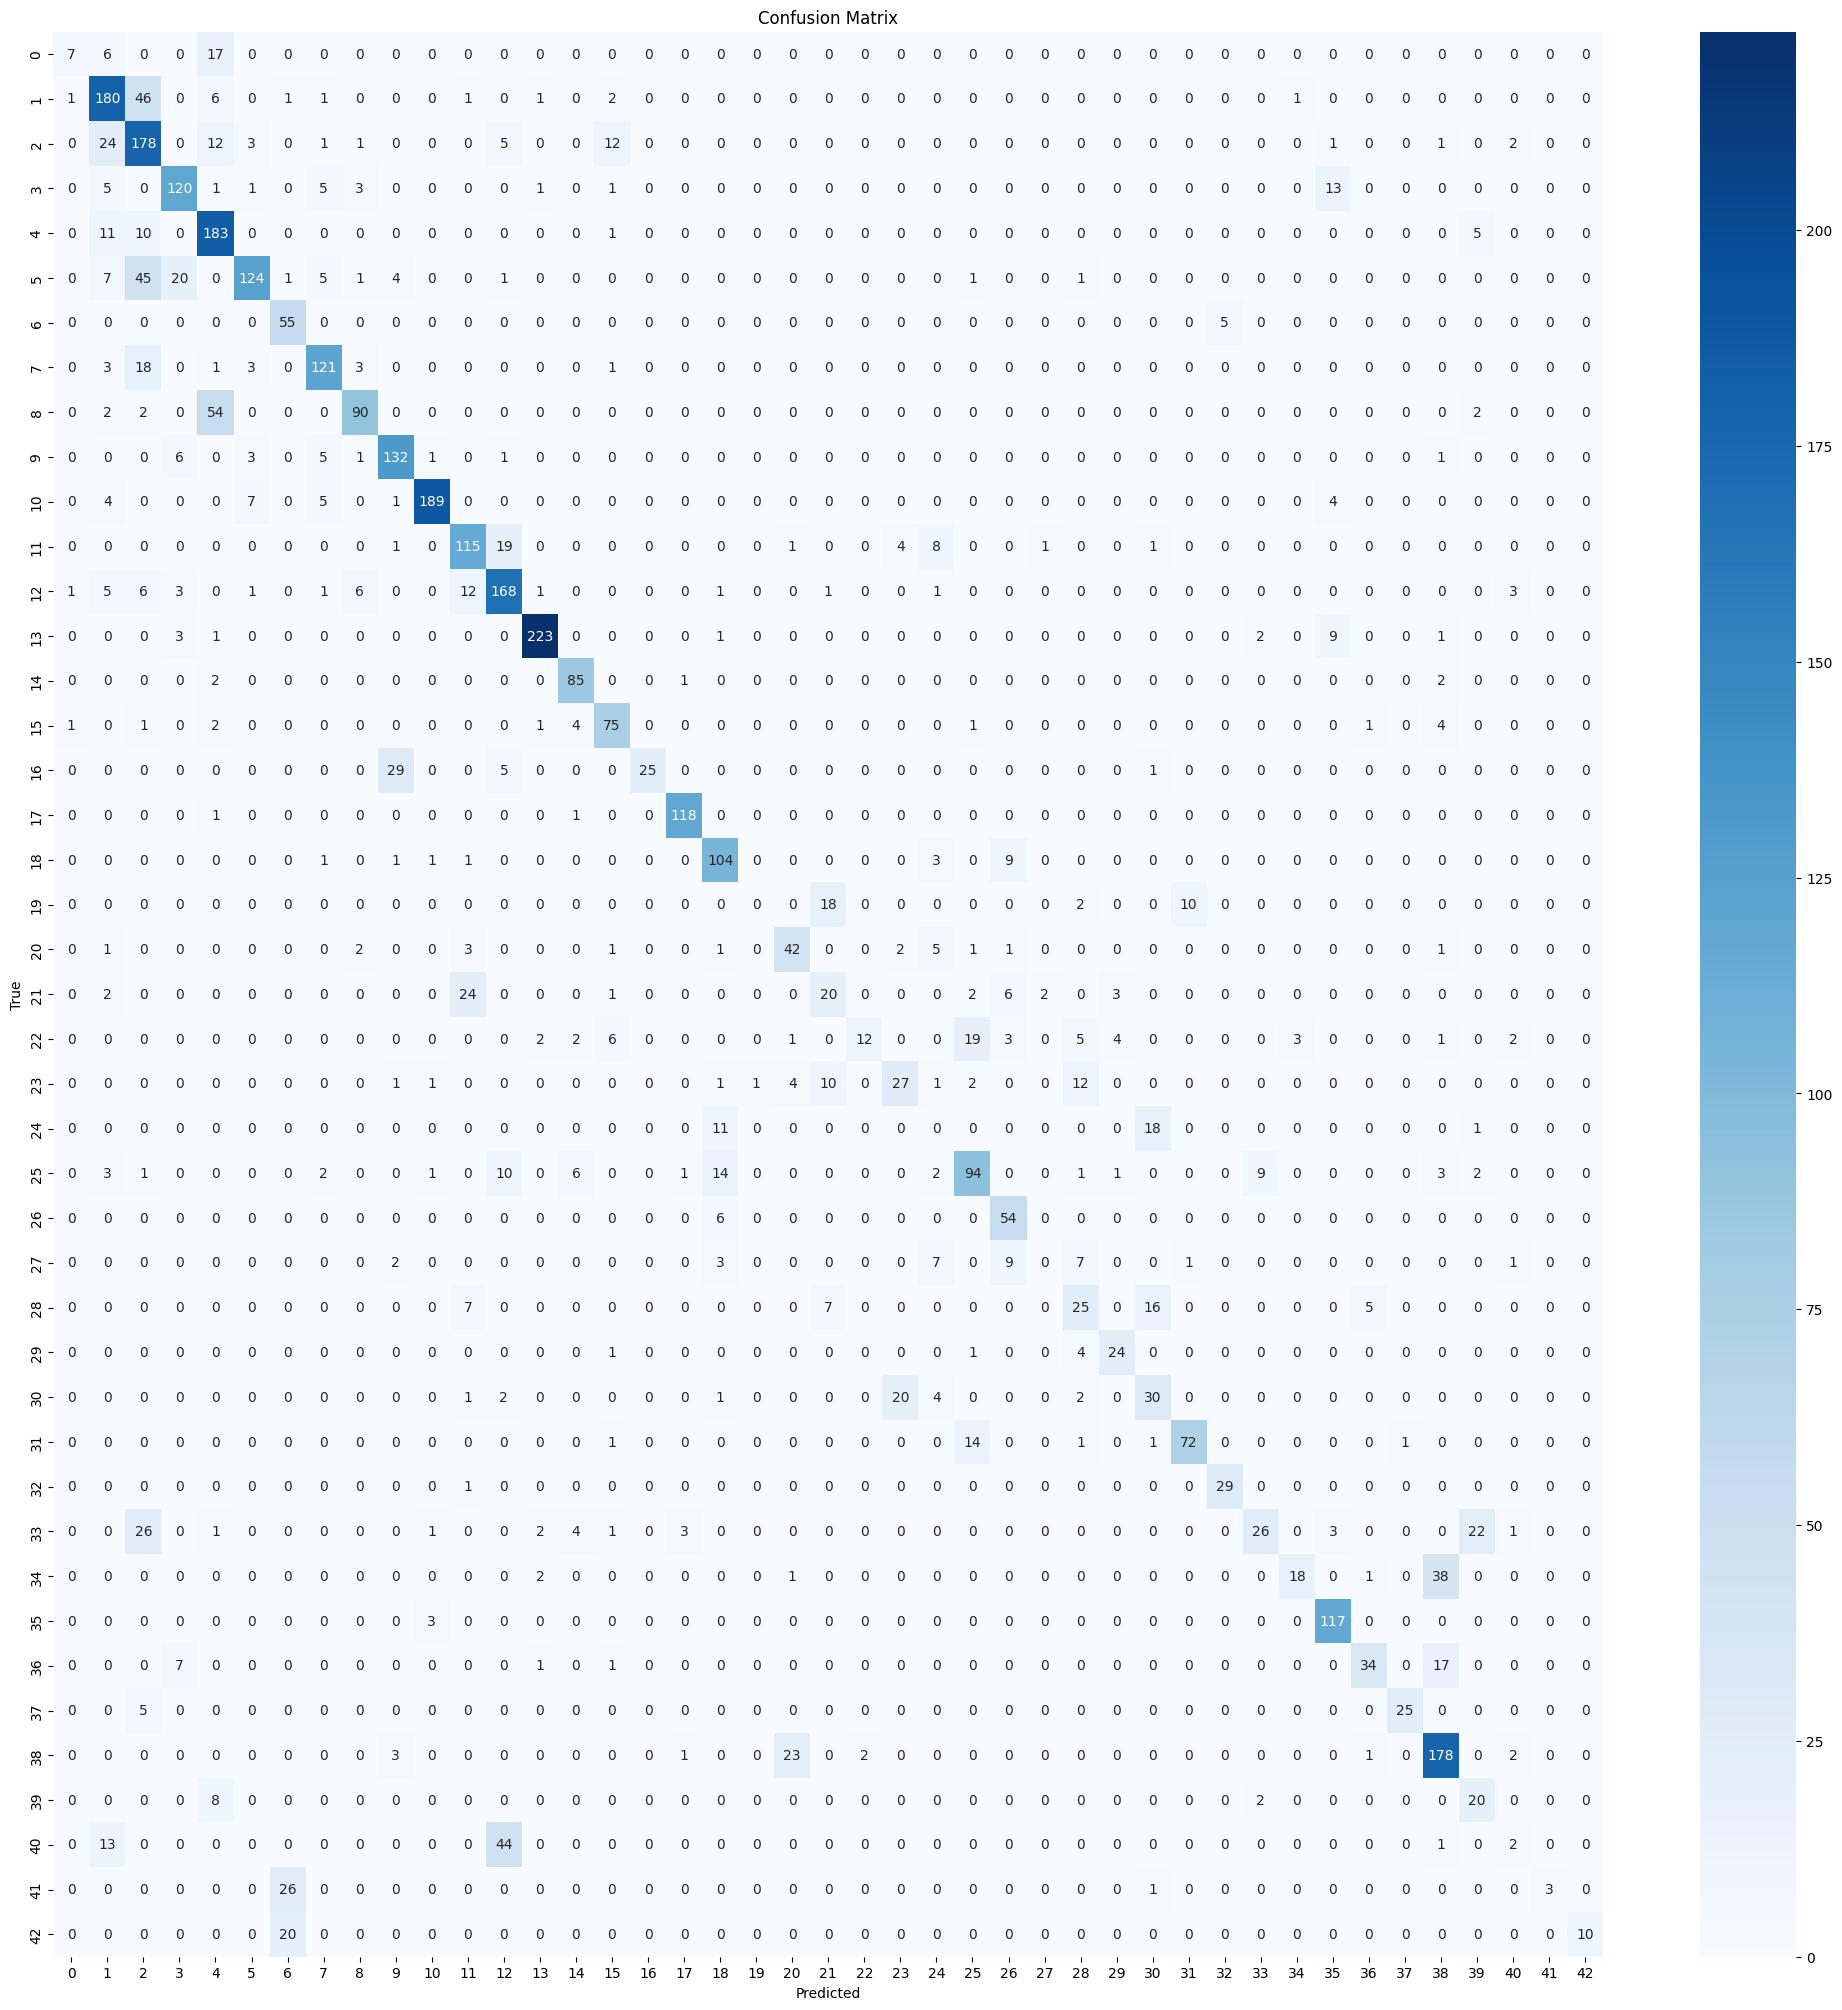

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions for the test data
predicted_probabilities = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true labels (assuming y_test contains the class labels directly)
y_true = y_test

# Print classification report
print(classification_report(y_true, predicted_classes))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(25, 25))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




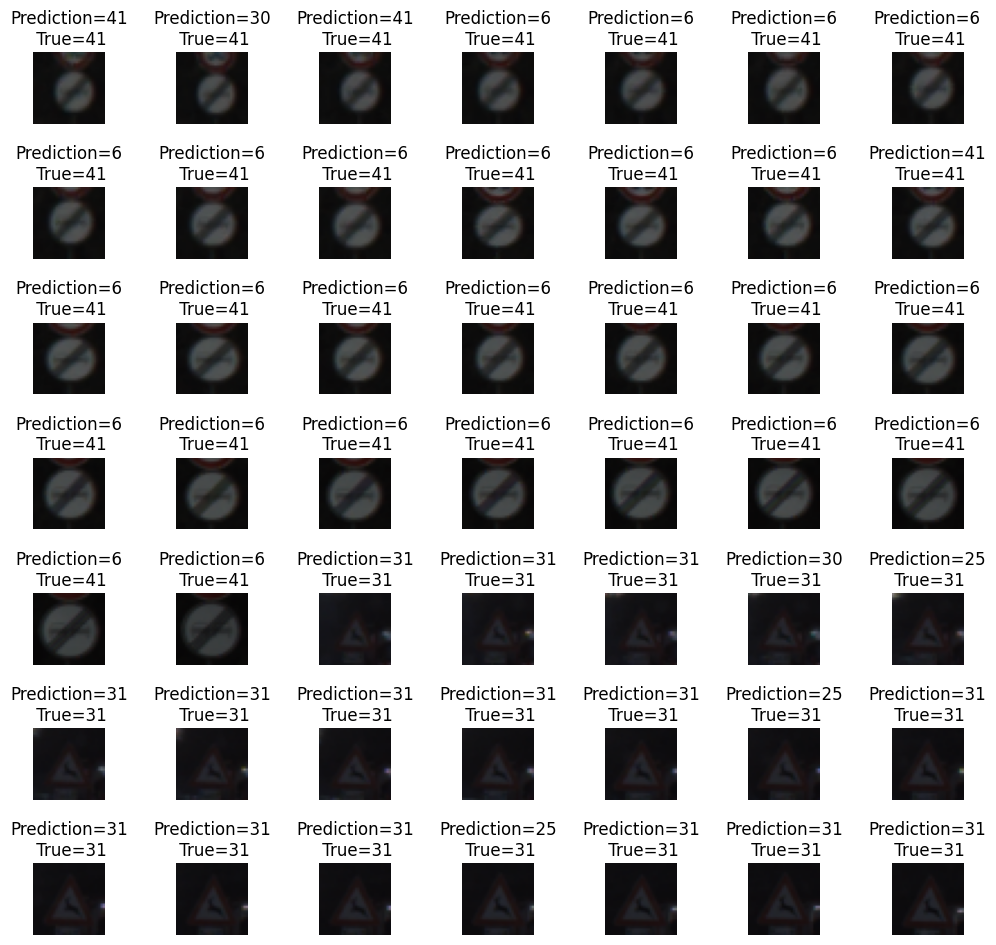

In [33]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)